## Import

In [1]:
%matplotlib notebook

import os, sys, datetime
import matplotlib.pyplot as plt
import numpy as np

#sys.path.append(r"D:\Code")
import qcodes as qc
# import characterizations.characterizations.mobility as mobility
from qcodes.dataset.data_set import DataSet, load_by_id
from qcodes.dataset.experiment_container import Experiment
import numpy as np
import scipy as sp
import scipy.optimize as spo
import matplotlib.pyplot as plt

from qcodes.dataset.database import initialise_database, get_DB_location

qc.config["core"]["db_location"] = r'D:\OneDrive\BF3\Data\experiments_2018-10.db'
initialise_database()

## Dynes DOS

### Definitions

In [2]:
# Lit.: https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.41.1509
def rho_Dynes(E, Gamma, Delta):
    return (E - 1j*Gamma) / ((E - 1j*Gamma)**2 - Delta**2)**0.5;

def rho_BCS(E, Delta):
    return np.real(np.abs(E) / (E**2 - Delta**2)**0.5);

def Fermi_Dirac(E, E_F, T):
    k_B = 8.6173303E-5; # k_B in eV
    return (np.exp((E - E_F)/(k_B * T)) + 1)**(-1);

#### Debug

<IPython.core.display.Javascript object>


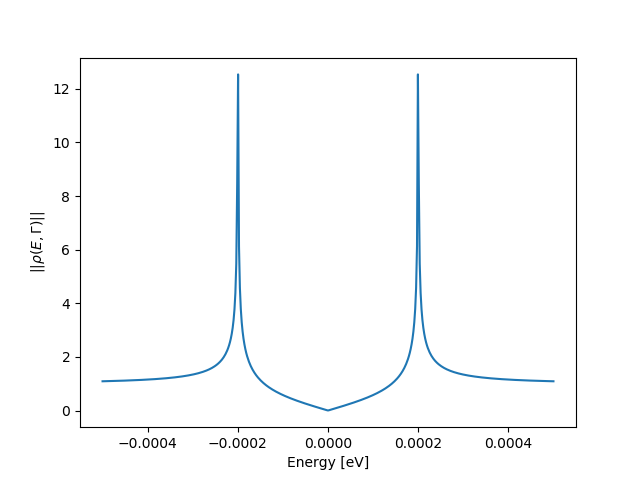

In [26]:
# Plot Dynes DOS
E = np.linspace(-500E-6, 500E-6, 500);
Delta = 200E-6;
Gamma = 0.001 * Delta;

rho_d = np.abs(rho_Dynes(E, Gamma, Delta));

plt.figure('dynes_theory_plot');
plt.plot(E, rho_d);
plt.xlabel('Energy [eV]');
plt.ylabel('$||\\rho(E, \\Gamma)||$');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


<IPython.core.display.Javascript object>


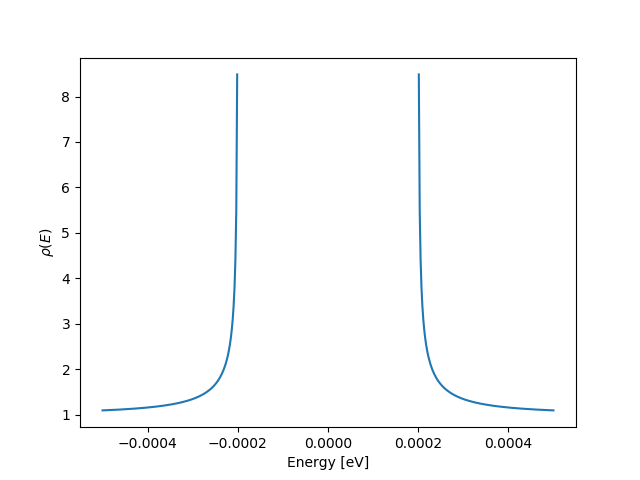

In [27]:
# Plot BCS DOS
E = np.linspace(-500E-6, 500E-6, 500);
Delta = 200E-6;

rho_b = rho_BCS(E, Delta);

plt.figure('bcs_theory_plot');
plt.plot(E, rho_b);
plt.xlabel('Energy [eV]');
plt.ylabel('$\\rho(E)$');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


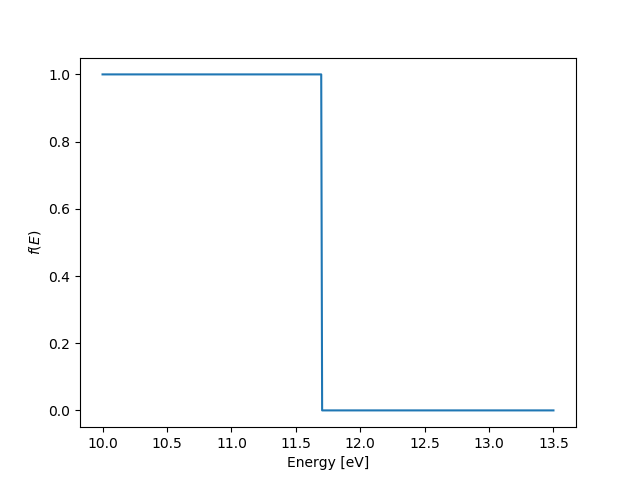

In [11]:
# Plot Fermi-Dirac
E = np.linspace(10, 13.5, 500);
E_F = 11.7; # eV
T = 100E-3;

f = Fermi_Dirac(E, E_F, T);

plt.figure('fermi-dirac_distribution');
plt.plot(E, f);
plt.xlabel('Energy [eV]');
plt.ylabel('$f(E)$');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


<IPython.core.display.Javascript object>


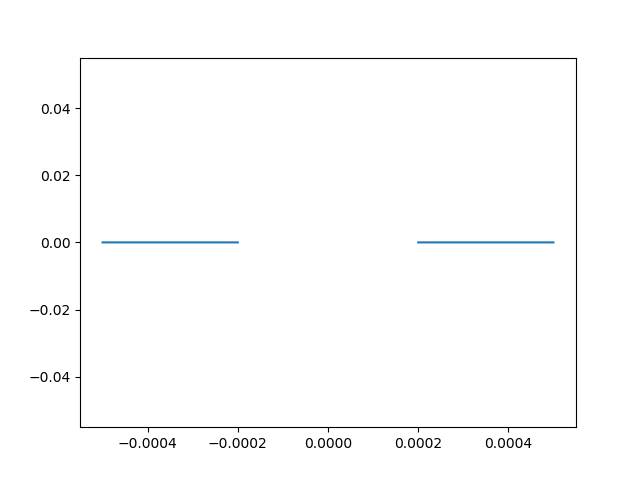

In [25]:
# Plot dI/dV from Dynes
E = np.linspace(-500E-6, 500E-6, 50000);
E_F = 11.7; # eV
Delta = 200E-6;
Gamma = 0.001 * Delta;
T = 100E-3;
E0 = 0;
G0 = 1/12906;
CN = G0*3;

rho_d = rho_Dynes(E, Gamma, Delta);
rho_b = rho_BCS(E + E0, Delta);
f_E = Fermi_Dirac(E, E_F, T);
f_E_E0 = Fermi_Dirac(E + E0, E_F, T);

dIdV = CN * rho_d * rho_b * (f_E - f_E_E0);

plt.figure('dI/dV_dynes')
plt.plot(E, np.abs(dIdV))

### Fitting

In [142]:
runid = 95;
dat = load_by_id(runid)
exp = Experiment(dat.path_to_db)
exp.exp_id = dat.exp_id
# dat.exp_name = exp.name

p = dat.get_values('datapoint')
# time_Bxyz = np.array(dat.get_values('meas_time_Bxyz')).reshape(-1)
# time_Brtp = np.array(dat.get_values('meas_time_Brtp')).reshape(-1)
time_Bx = np.array(dat.get_values('meas_time_Bx')).reshape(-1)
B_x = np.array(dat.get_values('B_x')).reshape(-1)
# B_y = np.array(dat.get_values('B_y')).reshape(-1)
# B_z = np.array(dat.get_values('B_z')).reshape(-1)
# B_r = np.array(dat.get_values('B_r')).reshape(-1)
# B_theta = np.array(dat.get_values('B_theta')).reshape(-1)
# B_phi = np.array(dat.get_values('B_phi')).reshape(-1)
